In [ ]:
%reload_ext autoreload
%autoreload 2

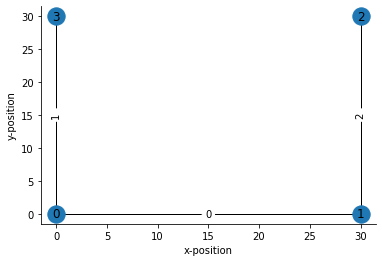

In [2]:
from track_linearization import make_track_graph, plot_track_graph
import matplotlib.pyplot as plt

node_positions = [(0, 0), # xy position of node 0
                  (30, 0), # xy position of node 1
                  (30, 30), # xy position of node 2
                  (0, 30), # xy position of node 3
                 ]

edges = [(0, 1), # connects node 0 and node 1
         (0, 3), # connects node 0 and node 3
         (1, 2), # connects node 1 and node 2
        ]

track_graph = make_track_graph(node_positions, edges)

fig, ax = plt.subplots()
plot_track_graph(track_graph, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

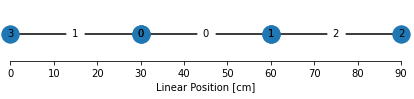

In [3]:
from track_linearization.utils import plot_graph_as_1D

linear_zero_node_id = 3
edge_order = [1, 0, 2]
edge_spacing = 0

fig, ax = plt.subplots(figsize=(7, 1))
plot_graph_as_1D(track_graph,
                 edge_order=edge_order,
                 edge_spacing=edge_spacing,
                 linear_zero_node_id=linear_zero_node_id,
                 ax=ax)

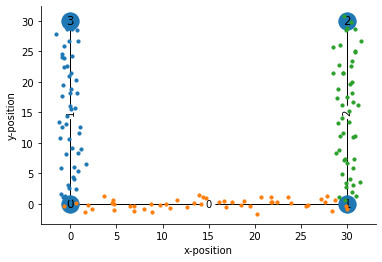

In [4]:
import numpy as np
from scipy.stats import multivariate_normal

fig, ax = plt.subplots()
plot_track_graph(track_graph, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

x = np.linspace(0, 30)

position = np.concatenate(
    (
        np.stack((np.zeros_like(x), x[::-1]), axis=1),
        np.stack((x, np.zeros_like(x)), axis=1),
        np.stack((np.ones_like(x) * 30, x), axis=1)
    )
)
position += multivariate_normal(mean=0, cov=.5).rvs(position.shape)

plt.scatter(position[:50, 0], position[:50, 1], s=10, zorder=11)
plt.scatter(position[50:100, 0], position[50:100, 1], s=10, zorder=11)
plt.scatter(position[100:, 0], position[100:, 1], s=10, zorder=11)

In [5]:
from track_linearization import get_linearized_position

position_df = get_linearized_position(
    position=position,
    track_graph=track_graph, 
    linear_zero_node_id=linear_zero_node_id,
    edge_order=edge_order,
    edge_spacing=edge_spacing)

Text(0.5, 0, 'Time')

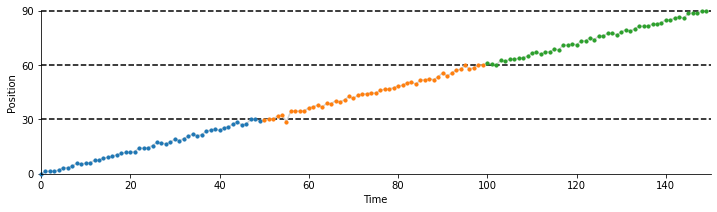

In [6]:
fig, ax = plt.subplots(figsize=(12, 3))
ax.scatter(position_df.index[:50], position_df.linear_position[:50], s=10, zorder=2, clip_on=False)
ax.scatter(position_df.index[50:100], position_df.linear_position[50:100], s=10, zorder=2, clip_on=False)
ax.scatter(position_df.index[100:], position_df.linear_position[100:], s=10, zorder=2, clip_on=False)
ax.plot(position_df.index, position_df.linear_position, color="lightgrey", zorder=1, clip_on=False)
ax.axhline(30, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(60, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(90, color="black", zorder=0, linestyle="--", clip_on=False)
ax.set_yticks([0, 30, 60, 90])
ax.set_ylim([0, 90])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0, position_df.shape[0]))
ax.set_ylabel("Position")
ax.set_xlabel("Time")

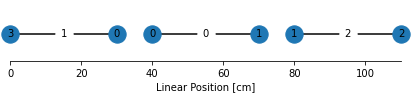

In [7]:
from track_linearization import get_linearized_position

linear_zero_node_id = 3
edge_order = [1, 0, 2]
edge_spacing = 10

fig, ax = plt.subplots(figsize=(7, 1))
plot_graph_as_1D(track_graph,
                 edge_order=edge_order,
                 edge_spacing=edge_spacing,
                 linear_zero_node_id=linear_zero_node_id,
                 ax=ax)

Text(0.5, 0, 'Time')

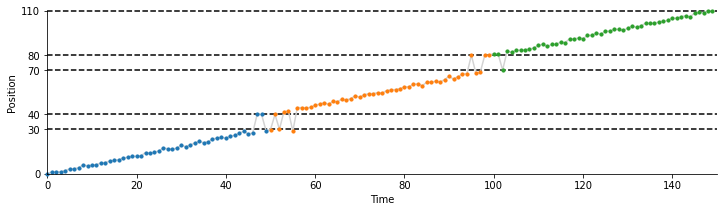

In [8]:
position_df = get_linearized_position(
    position=position,
    track_graph=track_graph, 
    linear_zero_node_id=linear_zero_node_id,
    edge_order=edge_order,
    edge_spacing=edge_spacing)

fig, ax = plt.subplots(figsize=(12, 3))
ax.scatter(position_df.index[:50], position_df.linear_position[:50], s=10, zorder=2, clip_on=False)
ax.scatter(position_df.index[50:100], position_df.linear_position[50:100], s=10, zorder=2, clip_on=False)
ax.scatter(position_df.index[100:], position_df.linear_position[100:], s=10, zorder=2, clip_on=False)
ax.plot(position_df.index, position_df.linear_position, color="lightgrey", zorder=1, clip_on=False)
ax.axhline(30, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(40, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(70, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(80, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(110, color="black", zorder=0, linestyle="--", clip_on=False)
ax.set_yticks([0, 30, 40, 70, 80, 110])
ax.set_ylim([0, 110])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0, position_df.shape[0]))
ax.set_ylabel("Position")
ax.set_xlabel("Time")